# Let's test if the figaro method works

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import os
import sys
from astropy.table import Table

from scipy.stats import gaussian_kde, multivariate_normal

### First check the Z gaussian Distribution

we know the our z space data should follows a gaussian distribution centered in 0 and with a $\sigma$=1.0 since it was forced during the normalization flow:

In [2]:
# IMPORT Z SPACE DATA

path = 'new_mock4Marco_4deg/results/'
savepath = path+'Figaro_outputs/'

if not os.path.exists(savepath):
    os.makedirs(savepath)

z_train = pd.read_csv(path+'z_train_region.csv')
z_train = z_train.drop(columns=['Unnamed: 0'])

X_test = pd.read_csv(path+'X_test_10hl_region.csv')
z_test = pd.read_csv(path+'z_test_5hl_region.csv')
z_test = z_test.drop(columns=['Unnamed: 0'])
z_test.head(10)

# THEORETICAL NORMALIZED GAUSSIAN DISTRIBUTION
mean = 0
std_dev = 1
norm_train = np.linspace(-5, 5, z_train.shape[0])
norm_test = np.linspace(-5, 5, z_test.shape[0])
y_norm_train = multivariate_normal.pdf(norm_train, mean, std_dev)
y_norm_test = multivariate_normal.pdf(norm_test, mean, std_dev)

In [3]:
members_indices = np.where(z_test['source_id'] == 42)[0]
nonmembers_indices = np.where(z_test['source_id'] != 42)[0]

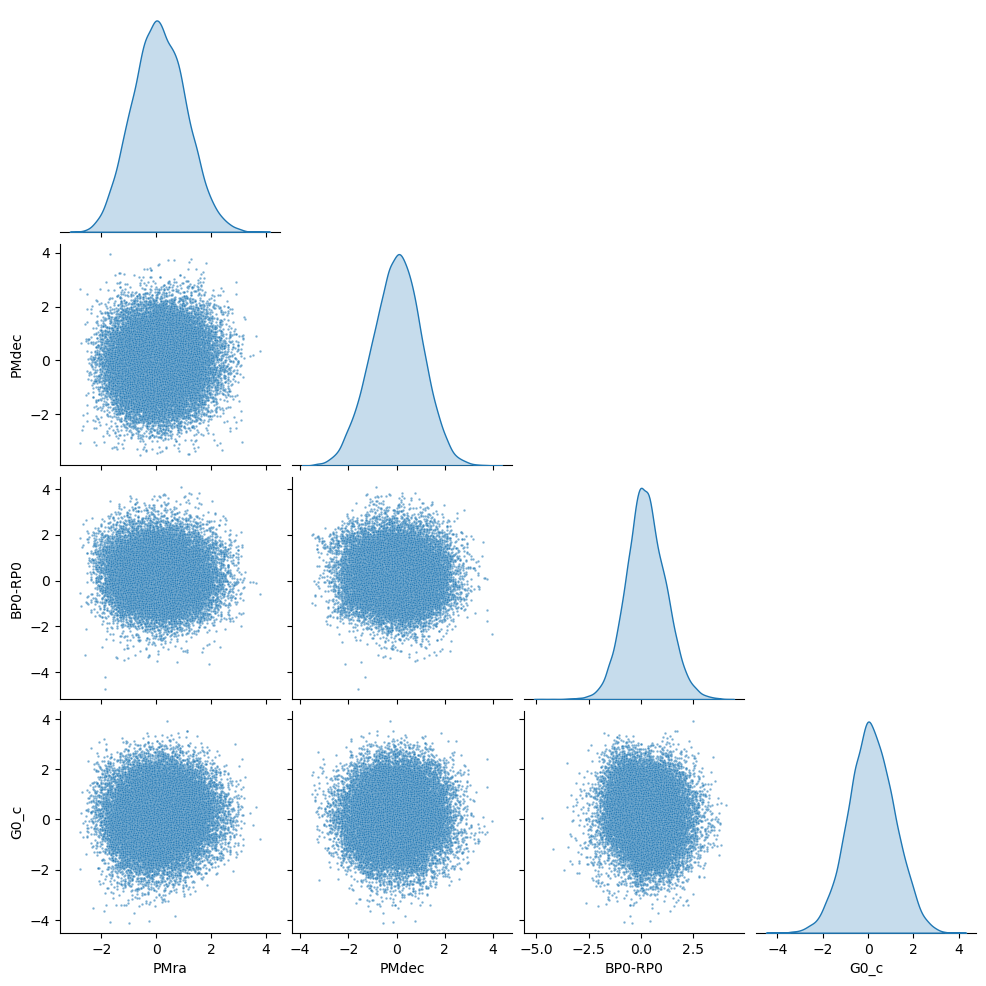

In [4]:
sns.pairplot(z_train[['PMra','PMdec','BP0-RP0','G0_c']], diag_kind='kde', plot_kws={"alpha": 0.6, "s": 3}, corner=True)

In [5]:
z_test.head()

,source_id,Xi,Xn,PMra,PMdec,BP0-RP0,G0_c,pmra_error,pmdec_error,pmra_pmdec_corr,Mahalanobis_PM,MemberScore
0,42,0.096785,0.179114,0.192681,1.499806,0.584133,-0.742758,0.162637,0.160297,-0.367,1.232248,0.250874
1,42,-0.126524,0.127148,0.082948,1.385924,0.587332,-0.853299,0.145267,0.133473,-0.367,0.635917,0.114067
2,42,0.217018,0.265220,0.699561,1.917257,0.580956,0.181294,0.412556,0.410381,-0.367,0.929124,0.318404
3,42,0.410965,0.071538,0.713469,1.674455,0.156929,0.534457,0.484729,0.446111,-0.367,0.715577,0.298499
4,42,0.209199,-0.287420,0.012986,0.704215,-2.959879,0.973967,0.700247,0.655137,-0.367,1.502599,0.534162


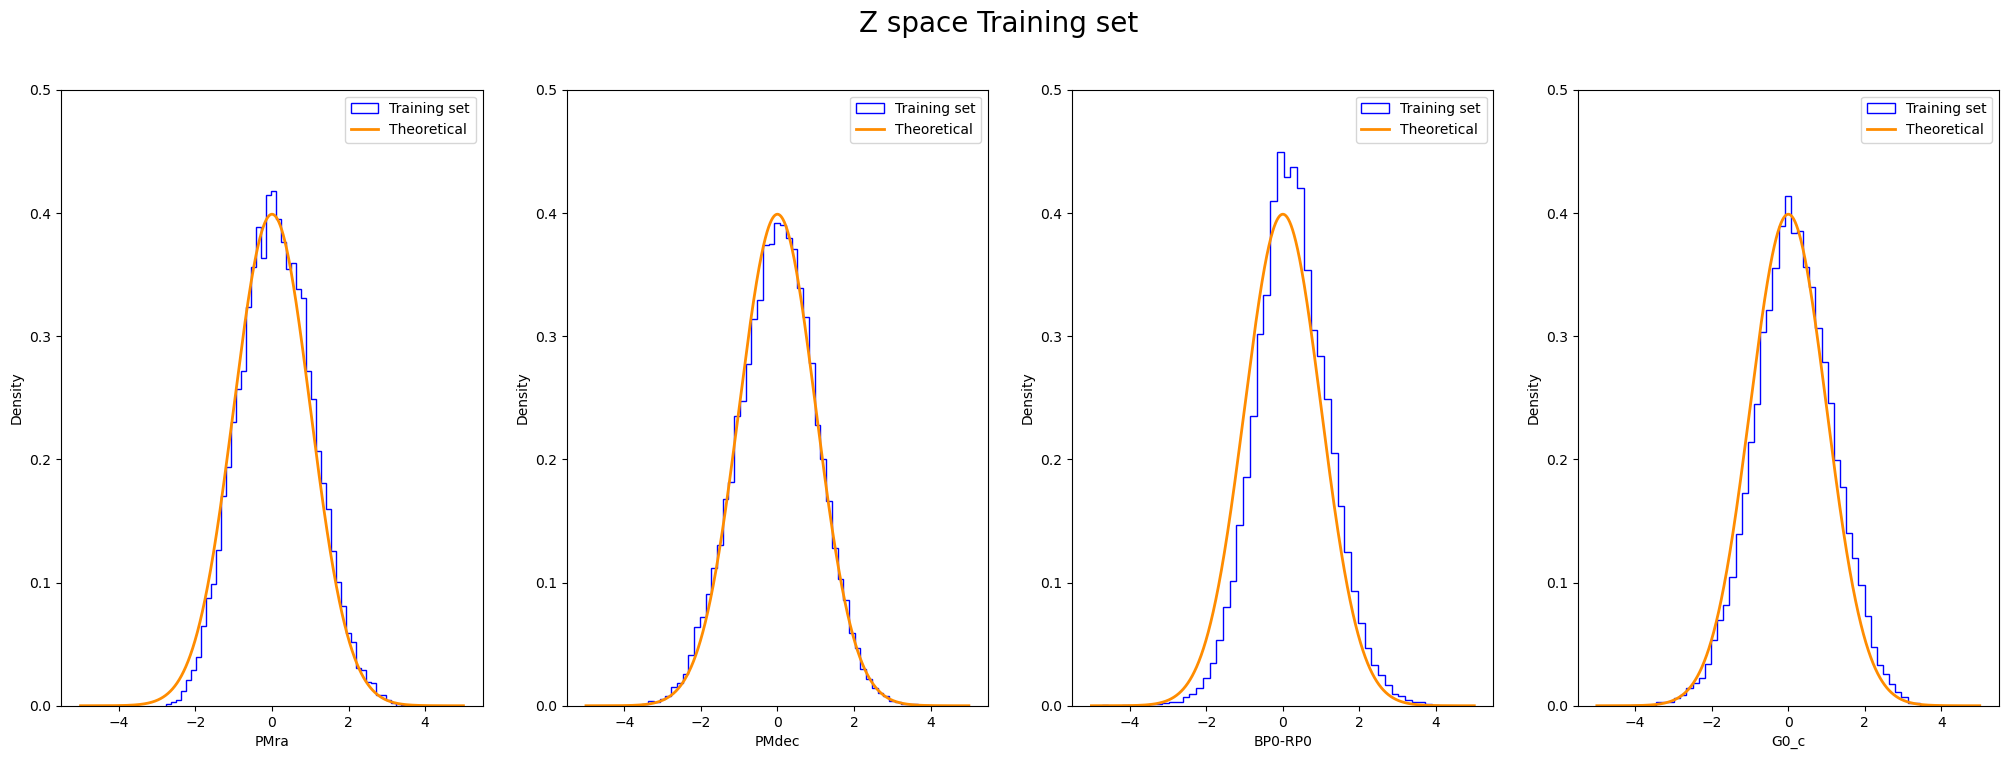

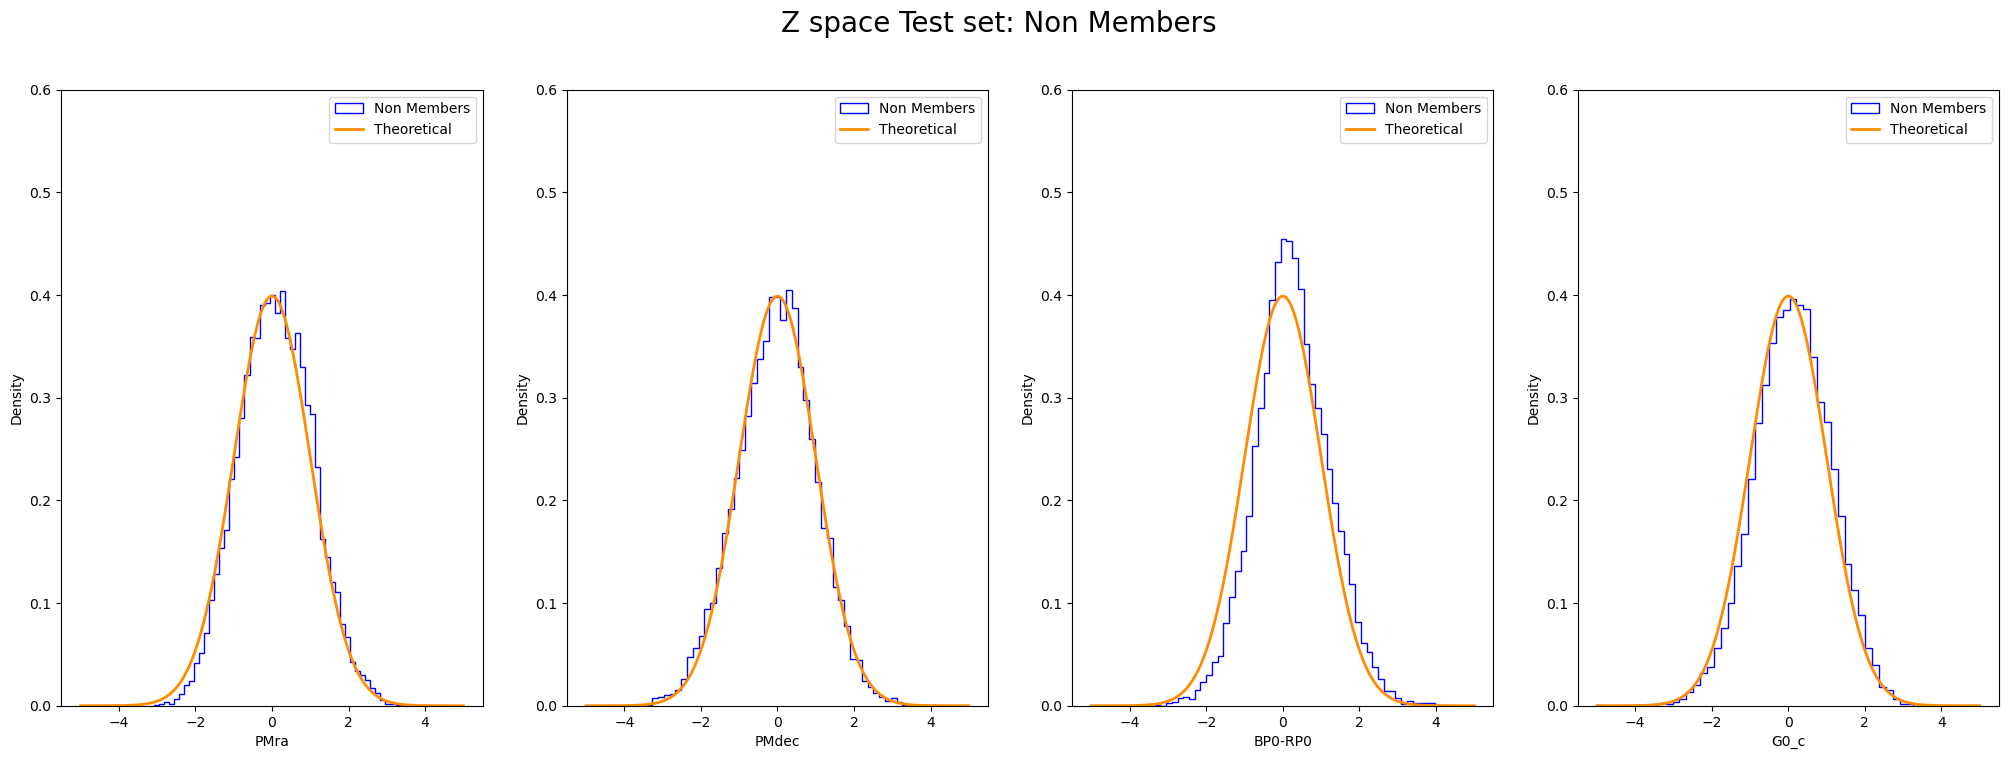

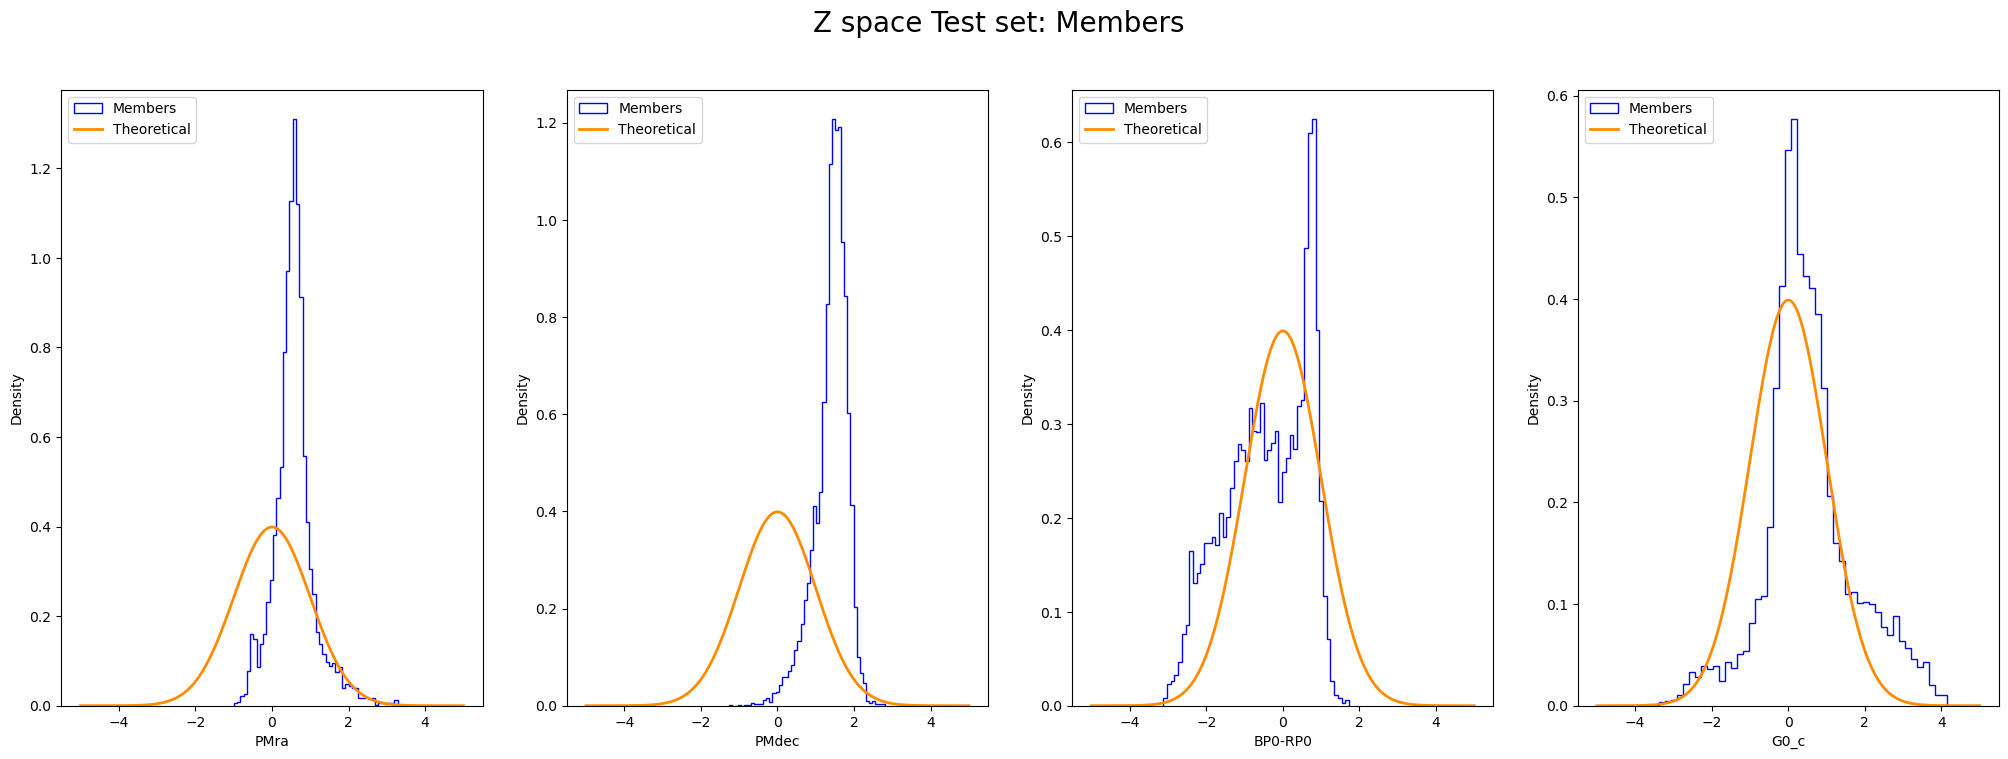

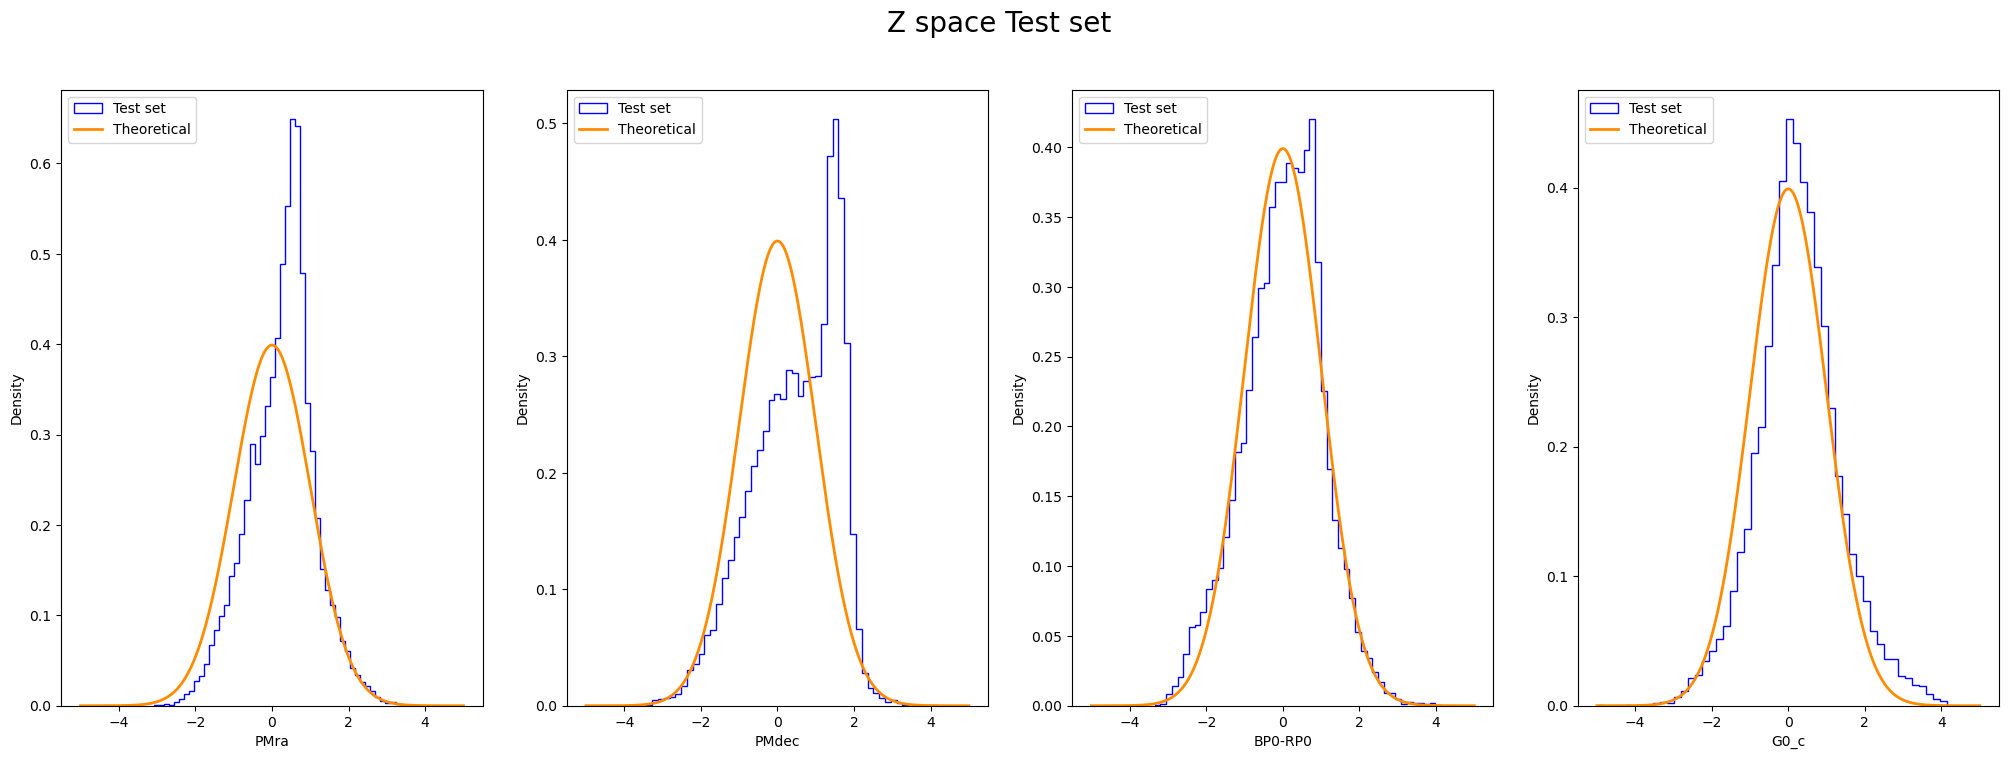

In [6]:
fig = plt.figure(figsize=(25,8))
fig.suptitle('Z space Training set', fontsize=20)
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.hist(z_train.iloc[:,3+i], color='blue', label='Training set', histtype='step', fill=False, bins=50, density=True)
    plt.plot(norm_train, y_norm_train, color='darkorange', label='Theoretical', linewidth=2)
    plt.xlabel(z_train.columns[3+i])
    plt.ylabel('Density')
    plt.ylim(0,0.5)
    plt.legend(loc='upper right')


fig = plt.figure(figsize=(25,8))
fig.suptitle('Z space Test set: Non Members', fontsize=20)
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.hist(z_test.iloc[nonmembers_indices,3+i], color='blue', label='Non Members', histtype='step', fill=False, bins=50, density=True)
    plt.plot(norm_test, y_norm_test, color='darkorange', label='Theoretical', linewidth=2)
    plt.xlabel(z_test.columns[3+i])
    plt.ylabel('Density')
    plt.ylim(0,0.6)
    plt.legend(loc='upper right')


fig = plt.figure(figsize=(25,8))
fig.suptitle('Z space Test set: Members', fontsize=20)
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.hist(z_test.iloc[members_indices,3+i], color='blue', label='Members', histtype='step', fill=False, bins=50, density=True)
    plt.plot(norm_test, y_norm_test, color='darkorange', label='Theoretical', linewidth=2)
    plt.xlabel(z_test.columns[3+i])
    plt.ylabel('Density')
    plt.legend(loc='upper left')

fig = plt.figure(figsize=(25,8))
fig.suptitle('Z space Test set', fontsize=20)
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.hist(z_test.iloc[:,3+i], color='blue', label='Test set', histtype='step', fill=False, bins=50, density=True)
    plt.plot(norm_test, y_norm_test, color='darkorange', label='Theoretical', linewidth=2)
    plt.xlabel(z_test.columns[3+i])
    plt.ylabel('Density')
    plt.legend(loc='upper left')

# test

in questo caso come nel paper di Figaro per le binarie consideriamo i nostri dati come se foosero delle stelle con velocità misurata solo per un'osservazione con il relativo errore

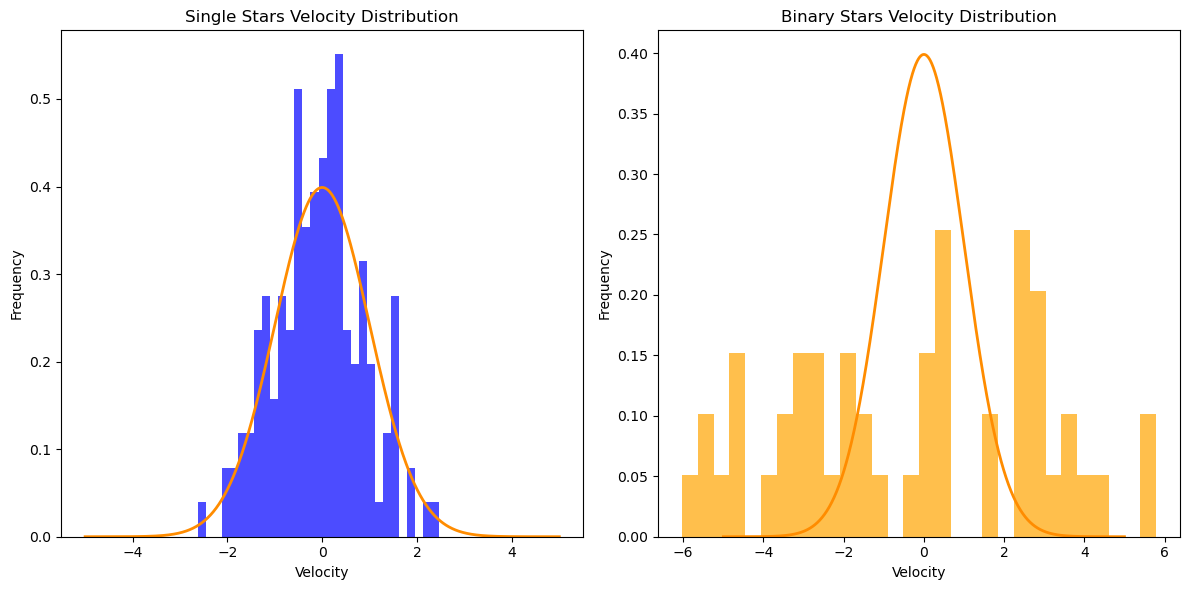

In [58]:
from scipy.stats import norm

# MOCK DATA
np.random.seed(42)

# Simulate 100 single stars (from Gaussian cluster velocity)
n_single = 150
v_single = np.random.normal(loc=0, scale=1, size=n_single)

# Simulate 20 binary stars (from complex distribution)
n_binary = 50
v_binary = np.concatenate([
    np.random.normal(loc=2, scale=2, size=n_binary // 2),
    np.random.normal(loc=-3, scale=2, size=n_binary // 2)
])

xx = np.linspace(-5, 5, 1000)
y_theoretical = norm.pdf(xx, loc=0, scale=1)
# check plot
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].hist(v_single, bins=30, density=True, color='blue', alpha=0.7, label='Single Stars')
ax[0].plot(xx, y_theoretical, color='darkorange', linewidth=2, label='Theoretical Gaussian')
ax[0].set_title('Single Stars Velocity Distribution')
ax[0].set_xlabel('Velocity')
ax[0].set_ylabel('Frequency')
ax[1].hist(v_binary, bins=30, density=True, color='orange', alpha=0.7, label='Binary Stars')
ax[1].plot(xx, y_theoretical, color='darkorange', linewidth=2, label='Theoretical Gaussian')
ax[1].set_title('Binary Stars Velocity Distribution')
ax[1].set_xlabel('Velocity')
ax[1].set_ylabel('Frequency')
plt.tight_layout()

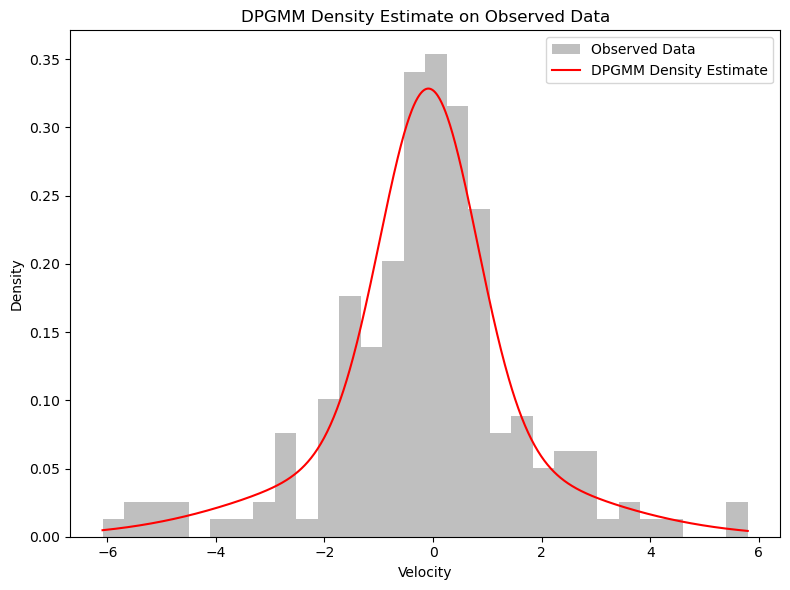

In [36]:
# Combine data
v_all = np.concatenate([v_single, v_binary])
labels_true = np.array([0]*n_single + [1]*n_binary)  # 0: single, 1: binary

# Add Gaussian noise (measurement uncertainty)
sigma_meas = np.full_like(v_all, 0.1)
v_obs = v_all + np.random.normal(0, sigma_meas)

# Shuffle the data
shuffle_idx = np.random.permutation(len(v_obs))
v_obs = v_obs[shuffle_idx]
sigma_meas = sigma_meas[shuffle_idx]
labels_true = labels_true[shuffle_idx]


# Fit a DPGMM to the observed data
from sklearn.mixture import BayesianGaussianMixture

dpgmm = BayesianGaussianMixture(
    n_components=10,
    weight_concentration_prior_type="dirichlet_process",
    weight_concentration_prior=0.1,
    covariance_type="full",
    max_iter=1000,
    random_state=0
)
dpgmm.fit(v_obs.reshape(-1, 1))

x_dpgmm = np.linspace(v_obs.min(), v_obs.max(), 1000).reshape(-1, 1)
y_dpgmm = np.exp(dpgmm.score_samples(x_dpgmm))
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(v_obs, bins=30, density=True, color='gray', alpha=0.5, label='Observed Data')
ax.plot(x_dpgmm, y_dpgmm, color='red', label='DPGMM Density Estimate')
ax.set_title('DPGMM Density Estimate on Observed Data')
ax.set_xlabel('Velocity')
ax.set_ylabel('Density')
ax.legend()
plt.tight_layout()

Eq. 16 - posterior for Binaries

$$
p(O_i | z_i = B) = \prod_{j}^{n_j} \int N(v_{r,j} | v_{i,j}, \delta_{i,j}) \, p(v_{r,j} | z_i = B) dv_{r,j}
$$
dove abbiamo solo un $j$ in quanto sono singola osservazione
$$
p(O_i | z_i = B) =  \int N(v_{r} | v_{i}, \delta_{i}) \, p(v_{r} | z_i = B) dv_{r}
$$


===========================================================================================================================

Eq. 17 - posterior for Single

$$
p(O_i | z_i = B) = \int \prod_{j}^{n_j} \left (N(v_{cm} | v_{i,j}, \delta_{i,j}) \right )\, N(v_{cm} | V_0, \sigma_V) dv_{cm}
$$
dove abbiamo solo un $j$ in quanto sono singola osservazione
$$
p(O_i | z_i = B) = \int  N(v_{cm} | v_{i}, \delta_{i}) \, N(v_{cm} | V_0, \sigma_V) dv_{cm}
$$

In [ ]:
# Define DPGMM PDF
def dpgmm_pdf(x):
    log_probs = dpgmm.score_samples(np.array(x).reshape(-1, 1))
    return np.exp(log_probs)



def single_star_likelihood_eq17(v_obs, v_err, V0, sigma_V):
    """
    Compute the likelihood under the single star assumption (Eq. 17).
    """
    # Grid of possible CM velocities to integrate over
    v_grid = np.linspace(-5, 5, 1000)

    # Product of Gaussians N(v_cm | v_hat, sigma)
    likelihoods = norm.pdf(v_grid, loc=v_obs, scale=v_err)      

    # Multiply by prior on v_cm
    prior_vcm = norm.pdf(v_grid, loc=V0, scale=sigma_V)         # known distribution (normal one)
    integrand = likelihoods * prior_vcm

    # Numerical integration over v_cm
    return np.trapz(integrand, v_grid)


def binary_star_likelihood_eq16(v_obs, v_err, dpgmm_pdf):
    """
    Compute the likelihood under the binary star assumption (Eq. 16).
    dpgmm_pdf is a function returning the probability of a velocity under DPGMM.
    """
    v_grid = np.linspace(-10, 10, 1000)

    measurement = norm.pdf(v_grid, loc=v_obs, scale=v_err)
    product = measurement * dpgmm_pdf(v_grid)
    posterior = np.trapz(product, v_grid)

    return posterior

In [ ]:
from scipy.special import gamma as gamma_func
from tqdm.notebook import tqdm

# Implementing the Beta prior and updating rule as per the paper
def p_z_given_rest(N_S, N_B, alpha, zi):
    """Compute p(z_i = S/B | z_{-i}) using Eq. (15) from the paper."""
    if zi == 'S':
        return (N_S + (alpha / 2)) / (N_S + N_B + alpha)
    elif zi == 'B':
        return (N_B + (alpha / 2)) / (N_S + N_B + alpha)
    

## Gibbs sampling for model selection

n_iterations = 100

# Initialize latent labels based on number of stars and binaries
N = len(v_obs)
alpha = 2.0

# Initialize latent labels randomly
S_label = ['S']*n_single
B_label = ['B']*n_binary
z = np.array(S_label + B_label)
# Shuffle the labels
np.random.shuffle(z)
#z = np.random.choice(['S', 'B'], size=N)
trace_z = []

for it in tqdm(range(n_iterations), desc='iteration'):
    for i in range(N):
        # Count excluding current
        z_minus = np.delete(z, i)
        N_S = np.sum(z_minus == 'S')
        N_B = N - 1 - N_S

        v_i = v_obs[i]
        dv_i = sigma_meas[i]
        
        # Prior p(z_i = S/B | z_{-i})
        p_S_prior = p_z_given_rest(N_S, N_B, alpha, 'S')
        p_B_prior = p_z_given_rest(N_S, N_B, alpha, 'B')

        # Likelihoods
        likelihood_S = single_star_likelihood_eq17(v_i, dv_i, V0=0, sigma_V=1)
        likelihood_B = binary_star_likelihood_eq16(v_i, dv_i, dpgmm_pdf)

        # Posterior
        p_S = likelihood_S * p_S_prior
        p_B = likelihood_B * p_B_prior
        norm_factor = p_S + p_B
        p_S /= norm_factor
        p_B /= norm_factor

        # Sample new z_i
        #z[i] = np.random.choice(['S', 'B'], p=[p_S, p_B])
        
        if p_S > p_B:
            z[i] = 'S'
        else:
            z[i] = 'B'
        

    trace_z.append(z.copy())

# Estimate posterior probabilities over samples
trace_z_array = np.array(trace_z)
posterior_z_prob = np.mean(trace_z_array == 'S', axis=0)

posterior_z_prob[:10]

iteration:   0%|          | 0/250 [00:00<?, ?it/s]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [54]:
test_df = pd.DataFrame({
    'v_obs': v_obs,
    'sigma_meas': sigma_meas,
    'true_label': labels_true,
    'posterior_prob_S': posterior_z_prob
})
test_df.head(10)

,v_obs,sigma_meas,true_label,posterior_prob_S
0,-0.191612,0.1,0,1.0
1,-0.379979,0.1,0,1.0
2,-0.406329,0.1,0,1.0
3,2.359509,0.1,1,1.0
4,0.386080,0.1,0,1.0
5,-0.214528,0.1,0,1.0
6,-0.171624,0.1,0,1.0
7,0.303648,0.1,0,1.0
8,0.738919,0.1,0,1.0
9,0.115421,0.1,0,1.0


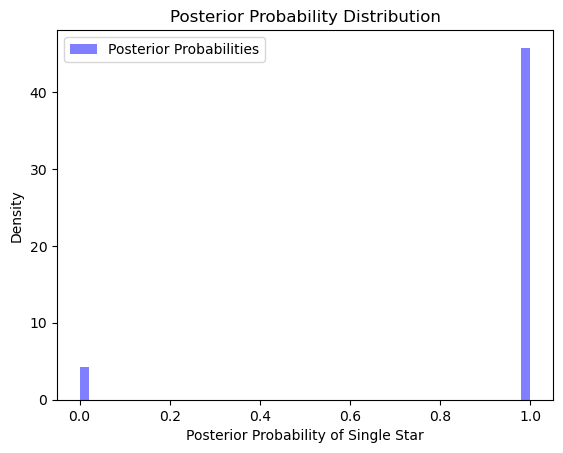

In [55]:
plt.hist(test_df['posterior_prob_S'].values, bins=50, density=True, alpha=0.5, color='blue', label='Posterior Probabilities')
plt.xlabel('Posterior Probability of Single Star')
plt.ylabel('Density')
plt.title('Posterior Probability Distribution')
plt.legend()

In [56]:
print(f"Number of single stars: {np.sum(test_df['true_label'] == 0)}")
print(f"Number of binary stars: {np.sum(test_df['true_label'] == 1)}")
print(f"Number of stars classified as single: {np.sum(test_df['posterior_prob_S'] > 0.5)}")
print(f"Number of stars classified as binary: {np.sum(test_df['posterior_prob_S'] <= 0.5)}")

Number of single stars: 150
Number of binary stars: 50
Number of stars classified as single: 183
Number of stars classified as binary: 17
